In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MigPreFuncoes

In [ ]:
#Estamos tentando reproduzir a figura do artigo do Tabti sem sucesso

****

### Criando o Modelo 

****

In [2]:
fr=40
nps=200
dt=.005 
rick=MigPreFuncoes.ricker(nps,fr,dt)

sx=10  #index position
sz=0  #index position
nx=110
nz=100;
dt=.005
dx=10  #meters
dz=dx  #meters
c=1992 #velocidade
tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))
#print(nt)
nd2=nt+1; 
W=np.zeros(2*nt);
#print(W.shape)
W[nt:nt+nps-1]=rick[0:nps-1];
x=np.arange(0,nx)
z=np.arange(0,nz)

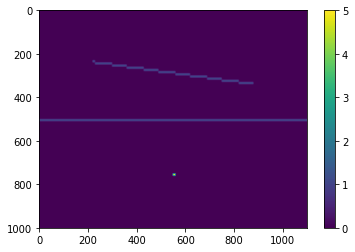

nx=110, nz=100
R.shape=(100, 110)


In [3]:
#Single Scatter

[X,Z]=np.meshgrid(x,z);
zz=(dz*Z)**2;
X=(dx*X);                                            # Compute X & Z Matrices
R=X*0.0;



#Refletor Horizontal    
for i in range(int(0),int(nx)):
    R[int(np.round(nz/2)),i]=1
    
    
#Refletor Dip
x_ini = int(np.round(1*nx/5))
x_fim = int(np.round(4*nx/5))
theta=30

for i in range(x_ini,x_fim):
    z = int(np.round(i*np.cos(theta)) + np.round(nz/5))
    R[z,i]=1

#Ponto Difrator
R[int(np.round(6*nz/8)),int(np.round(nx/2))]=5

#R[int(np.round(nz/2)),int(np.round(1*nx/6))]=1.0
#R[int(np.round(nz/2)),int(np.round(3*nx/6))]=1.0
#R[int(np.round(nz/2)),int(np.round(5*nx/6))]=1.0


#R[np.int(np.round(nz/2)),np.int(np.round(nx/2))]=1; # Compute Refl. Model for pt scatterer
#print('vel1',vel1.shape)

plt.imshow(R, extent=[0, nx*dx, nz*dz, 0], aspect='auto')
plt.colorbar()
plt.show()

print(f"nx={nx}, nz={nz}")
print(f"R.shape={R.shape}")

(100, 110)


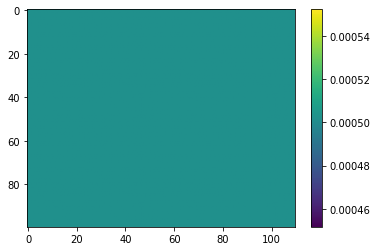

In [4]:
SW=np.ones([nz,nx])*1/c
print(SW.shape)
plt.imshow(SW, aspect="auto")
plt.colorbar()

*****

## Traçador de Raios

*******

In [5]:
## Essa linha só precisa ser rodada uma vez, quando mudamos o modelo de vagarosidade (SW)

#Armazenamos a TT no file.npy, acessado na próxima célula.

#TT=MigPreFuncoes.raymodel3(SW,dx,nx,"CSGhomo/raiosHomoBarra.npy")

In [6]:
with open('Data/CSG_diffbar/Tabti/raiosTabti.npy', 'rb') as f:
    TTh = np.load(f)

print(f"TTh.shape={TTh.shape}")

TTh.shape=(110, 100, 110)


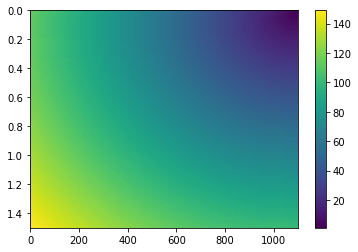

TSX.shape=(100, 110)


In [7]:
TSX = (TTh[-1,:,:]/dt+1).astype(int)  # Traveltime  (indexes)
plt.imshow(TSX,extent=[0, nx*dx, nt*dt, 0], aspect='auto')
plt.colorbar()
plt.show()

print(f"TSX.shape={TSX.shape}")

******

## Criando o Dado Sintético

******


### Create file with all shot gathers

nsx=nx #105  #numero de tiros (pode ser no máximo o valor de TTh axis=0)
ngx=nx #105   #numero de receptores (pode ser no máximo o valor de TTh axis=0)
#Loop over shots
for isx in range(0,nsx,5):
    print('shot', isx)
    D = np.zeros([nt,ngx])
    TSX = (TTh[isx,:,:]/dt+1).astype(int)  # Traveltime  (indexes)


    # Loop Over Traces
    for gx in range(0,ngx):
        TXG=(TTh[gx,:,:]/dt+1).astype(int)  # Traveltime in heterogeneous medium (indexes)
                         
      
        #Loop over time sample in a trace
        for t in range(0,nt):
            M=W[t-(TSX+TXG)+nt+1]*R
            D[t,gx]=np.sum(M.flatten('F'));
            #D[t,gx]=np.sum(M.flatten());
        gather1=np.diff(D[:,:],n=2,axis=0);
        
    filename = 'CSGhomo/gather_shotTabti{}'.format(isx)
    with open(filename, 'wb') as f:
        np.save(f, gather1)

#plt.imshow(np.diff(D),aspect='auto',extent=[0, nx*dx, nt*dt, 0])
plt.imshow(gather1,aspect='auto',extent=[0, nx*dx, nt*dt, 0])
plt.title('Synthetic CSG with Shot at %f m'%(sx*dx))
plt.xlabel('X (m)')
plt.ylabel('Time (s)')
plt.show()

In [8]:
files = []

for i in range(0,105,5):
    filename = 'Data/CSG_diffbar/Tabti/gather_shotTabti{}'.format(i)
    with open(filename, 'rb') as file:
        (gather) = np.load(file)
        files.append(gather)

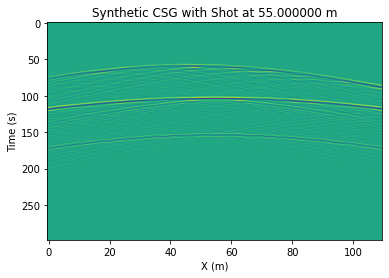

In [9]:
isx = 55 #55
filename = 'Data/CSG_diffbar/Tabti/gather_shotTabti{}'.format(int(isx))
with open(filename, 'rb') as file:
    gather1h = np.load(file)
    
plt.imshow(gather1h, aspect='auto')
plt.title('Synthetic CSG with Shot at %f m'%(int(isx)))
plt.xlabel('X (m)')
plt.ylabel('Time (s)')
plt.show()

len(tempos)=110
gathern.shape=(298, 110)


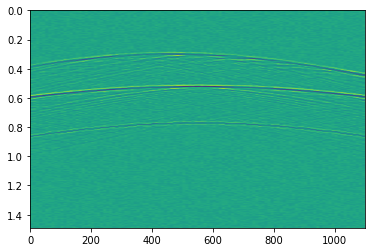

In [10]:
#Adicionando ruído
nx=110
nz=100;
dt=.005
dx=10
dz=dx
nsx=110
[nt,ntr] = gather1h.shape
nn = np.random.rand(nt,ntr)
gathern = gather1h+(nn-0.5)*2.0
plt.imshow(gathern, aspect='auto',extent=[0, dx*ntr,dt*nt, 0])
# Scatterer at [20,50]

timer=np.round(TTh/dt)+1;
txg = TTh[:,20,50]  # tempo do difrator em (20,50) ate os geofones
txs = TTh[50,20,50] # tempo do difrator em (20,50) ate o tiro em 50

tempos=txg + txs
pos_tiros=np.arange(0,dx*nsx,dx)

#plt.plot(pos_tiros,tempos)
print(f"len(tempos)={len(tempos)}")
print(f"gathern.shape={gathern.shape}")

In [35]:
isx=0
igx=5

t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] 
trace1=gather1h.T[np.ix_([igx],t.flatten().astype(np.int32))]

print(np.shape(t))

(100, 110)


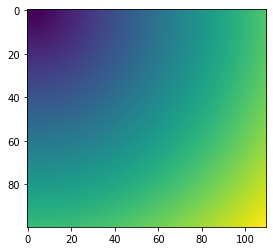

In [36]:
plt.imshow(t)

In [29]:
trace1 = trace1.reshape([nz,nx])

np.shape(trace1)

(100, 110)

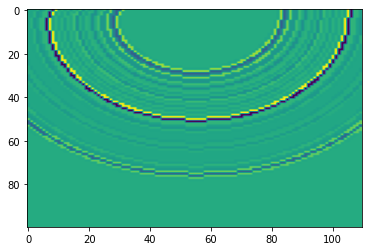

In [30]:
plt.imshow(trace1,aspect="auto")
plt.show()